# Monte Carlo Simulation for FE
## IEOR 4703

### Generation of standard normals using different methods

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

from scipy.stats import norm

# import our implementation of the rational approximation
from rational_approximation import rational_approximation

In [6]:
n = 200000
z1 = np.zeros(n)
z2 = np.zeros(n)
z3 = np.zeros(n)

x1 = np.linspace(-3, 3, 1000)
pdf1 = norm.pdf(x1, 0, 1)

In [7]:
np.random.seed(263456)

### Rational approximation

In [8]:
t1 = time()
u = np.random.rand(n)
for i in range(n):
    z1[i] = rational_approximation(u[i])
print('Elapsed time is ' + str(time() - t1) + ' seconds.')

Elapsed time is 0.5523760318756104 seconds.


### Box-Muller method

In [9]:
t2 = time()
u = np.random.rand(n)
for i in range(n//2):
    u1 = u[i]
    u2 = u[i + n//2]
    tmp = np.sqrt(-2*np.log(u1))
    z2[i] = tmp * np.cos(2*np.pi*u2)
    z2[i + n//2] = tmp * np.sin(2*np.pi*u2)
print('Elapsed time is ' + str(time() - t2) + ' seconds.')

Elapsed time is 0.6258985996246338 seconds.


### Marsaglia Polar method

In [10]:
t3 = time()
for i in range(n//2):
    s = 2
    while s > 1:
        u = np.random.rand(2)
        v1 = -1 + 2*u[0]
        v2 = -1 + 2*u[1]
        s = v1**2 + v2**2
    tmp = np.sqrt(-2*np.log(s)/s)
    z3[i] = tmp*v1
    z3[i + n//2] = tmp*v2
print('Elapsed time is ' + str(time() - t3) + ' seconds.')

Elapsed time is 0.7540755271911621 seconds.


### We now draw histograms to confirm normality.

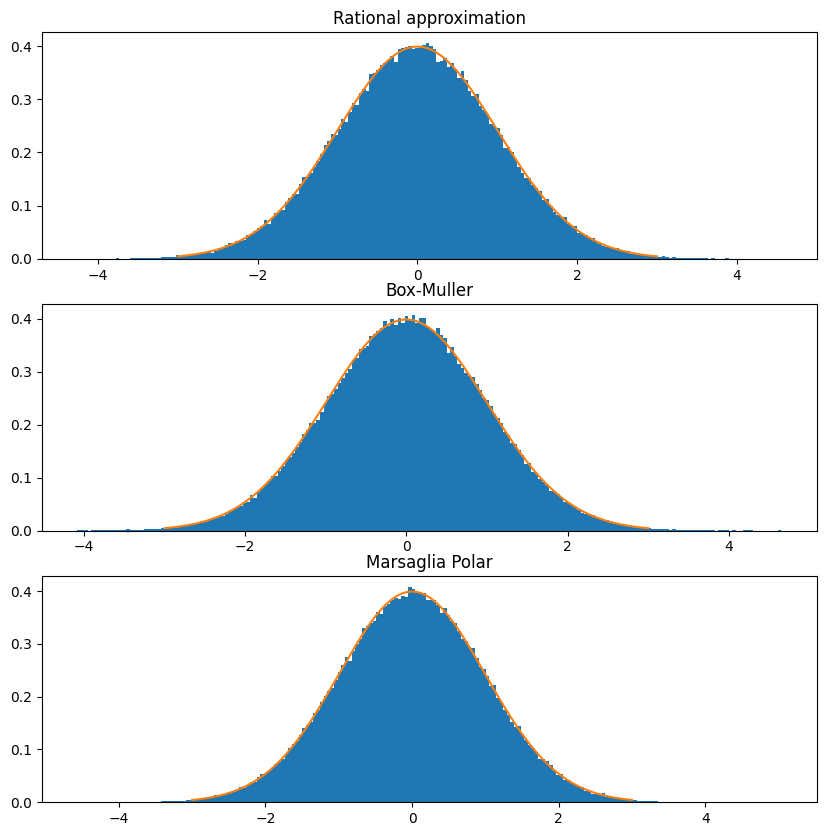

In [11]:
plt.figure(figsize=[10,10])
plt.subplot(311)
plt.hist(z1, density=True, bins=200)
plt.plot(x1, pdf1)
plt.title('Rational approximation')
plt.subplot(312)
plt.hist(z2, density=True, bins=200)
plt.plot(x1, pdf1)
plt.title('Box-Muller')
plt.subplot(313)
plt.hist(z3, density=True, bins=200)
plt.plot(x1, pdf1)
plt.title('Marsaglia Polar')
plt.show()